# Worked Examples: Lennard-Jones Optimisation

These worked solutions correspond to the [Synoptic Exercise: Geometry Optimisation of a Lennard-Jones Potential](../../geometry_optimisation/Lennard_Jones_optimisation.ipynb).

**How to use this notebook:**
- Try each exercise yourself first before looking at the solution
- The code cells show both the code and its output
- Download this notebook to run and experiment with the code yourself
- Your solution might look different - that's fine as long as it gives the correct answer!

**Parameters for this exercise:**
- $A$ = 1 × 10<sup>5</sup> eV Å<sup>12</sup>
- $B$ = 40 eV Å<sup>6</sup>

In [1]:
# Code cell: Setup
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Define constants
A = 1e5  # eV Å^12
B = 40   # eV Å^6

## Part A: Visualising the Potential Energy Surface

This section helps us understand the shape of the Lennard-Jones potential before attempting optimisation.

### Question 1: Define the Lennard-Jones function

Write a function `lennard_jones(r, A, B)` that calculates $U_\mathrm{LJ}(r) = \frac{A}{r^{12}} - \frac{B}{r^6}$.

In [2]:
def lennard_jones(r, A, B):
    """
    Calculate the Lennard-Jones potential energy.
    
    Args:
        r (float): Interatomic separation in Angstroms.
        A (float): Repulsive term coefficient (eV Å^12).
        B (float): Attractive term coefficient (eV Å^6).
        
    Returns:
        float: Potential energy in eV.
    """
    return A / r**12 - B / r**6

# Test the function at r = 4.4 Å
test_r = 4.4
test_energy = lennard_jones(test_r, A, B)
print(f"At r = {test_r} Å, U = {test_energy:.4f} eV")

At r = 4.4 Å, U = -0.0036 eV


### Questions 2-3: Create array and plot

Create an array of $r$ values from 3.6 Å to 8.0 Å and plot the potential energy.

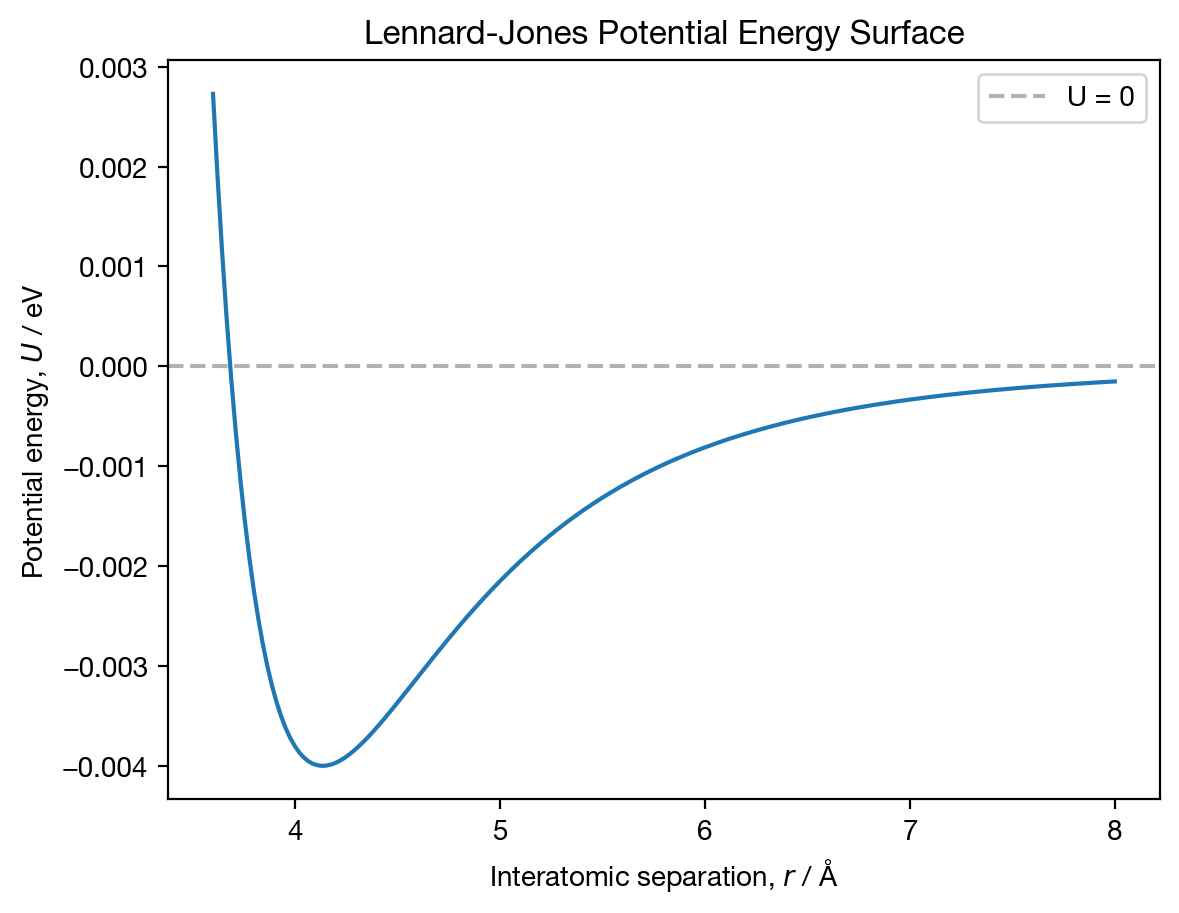

In [3]:
# Create array of r values
r_values = np.linspace(3.6, 8.0, 200)

# Calculate potential energy at each point
U_values = lennard_jones(r_values, A, B)

# Create the plot
plt.plot(r_values, U_values, '-')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3, label='U = 0')
plt.xlabel('Interatomic separation, $r$ / Å')
plt.ylabel('Potential energy, $U$ / eV')
plt.title('Lennard-Jones Potential Energy Surface')
plt.legend()
plt.show()

### Question 4: Analyse the plot

By examining the plot, we can identify key features of the potential energy surface.

In [4]:
min_idx = np.argmin(U_values)
r_min = r_values[min_idx]
U_min = U_values[min_idx]

# Find where U crosses zero (approximately)
# Look for sign change from negative to positive
zero_crossing_idx = np.where(np.diff(np.sign(U_values)))[0]
if len(zero_crossing_idx) > 0:
    r_zero = r_values[zero_crossing_idx[0]]
else:
    r_zero = None

print("Analysis of the Lennard-Jones potential:")
print(f"- Minimum location (equilibrium bond length): r ≈ {r_min:.2f} Å")
print(f"- Energy at minimum: U ≈ {U_min:.3f} eV")
if r_zero is not None:
    print(f"- Zero crossing (U = 0): r ≈ {r_zero:.2f} Å")

Analysis of the Lennard-Jones potential:
- Minimum location (equilibrium bond length): r ≈ 4.13 Å
- Energy at minimum: U ≈ -0.004 eV
- Zero crossing (U = 0): r ≈ 3.67 Å


**Physical interpretation:**

- The **minimum** at $r$ ≈ 4.13 Å represents the equilibrium separation where the forces balance ($\mathrm{d}U/\mathrm{d}r = 0$).
- The **negative energy** at the minimum indicates a bound state (the atoms attract each other).
- The **zero crossing** at $r$ ≈ 3.67 Å represents where the repulsive term ($A/r^{12}$) exactly equals the attractive term ($B/r^6$). At distances shorter than this, the net potential is repulsive ($U > 0$); at distances longer than this, the net potential is attractive ($U < 0$).

---

## Part B: Gradient Descent Optimisation

Now we'll use gradient descent with an adaptive step size to find the minimum.

### Question 5: Define the gradient function

Write a function `lennard_jones_gradient(r, A, B)` that calculates $U'_\mathrm{LJ}(r) = -12\frac{A}{r^{13}} + 6\frac{B}{r^7}$.

In [5]:
def lennard_jones_gradient(r, A, B):
    """
    Calculate the first derivative of the Lennard-Jones potential.
    
    Args:
        r (float): Interatomic separation in Angstroms 
        A (float): Repulsive term coefficient (eV Å^12).
        B (flaot): Attractive term coefficient (eV Å^6).
        
    Returns:
        First derivative dU/dr in eV/Å.
    """
    return -12 * A / r**13 + 6 * B / r**7

# Test the gradient function at r = 4.1 Å
test_gradient = lennard_jones_gradient(test_r, A, B)
print(f"At r = {test_r} Å, U' = {test_gradient:.6f} eV/Å")
print("(Should be close to zero since r ≈ 4.1 Å is near the minimum)")

At r = 4.4 Å, U' = 0.002337 eV/Å
(Should be close to zero since r ≈ 4.1 Å is near the minimum)


### Questions 6-8: Implement gradient descent

Implement a gradient descent loop starting from r = 5.0 Å with learning rate α = 100.

In [6]:
# Gradient descent parameters
r_start = 5.0  # Å
alpha = 100    # Learning rate
max_iterations = 50
tolerance = 0.001

# Initialize storage lists
positions = [r_start]
gradients = [lennard_jones_gradient(r_start, A, B)]

# Current position
r_current = r_start

# Gradient descent loop
for iteration in range(max_iterations):
    # Calculate gradient at current position
    grad = lennard_jones_gradient(r_current, A, B)
    
    # Update position using: r_{i+1} = r_i - alpha * U'(r_i)
    r_new = r_current - alpha * grad
    
    # Store the new position and gradient
    positions.append(r_new)
    gradients.append(lennard_jones_gradient(r_new, A, B))
    
    # Check convergence
    if abs(gradients[-1]) < tolerance:
        print(f"Converged after {iteration + 1} iterations")
        break
    
    # Update current position
    r_current = r_new
else:
    print(f"Reached maximum iterations ({max_iterations})")

# Print results
print(f"\nFinal predicted equilibrium separation: r = {positions[-1]:.4f} Å")
print(f"Number of iterations required: {len(positions) - 1}")
print(f"Final gradient value: {gradients[-1]:.6f} eV/Å")

Converged after 4 iterations

Final predicted equilibrium separation: r = 4.1120 Å
Number of iterations required: 4
Final gradient value: -0.000413 eV/Å


### Visualise the convergence path

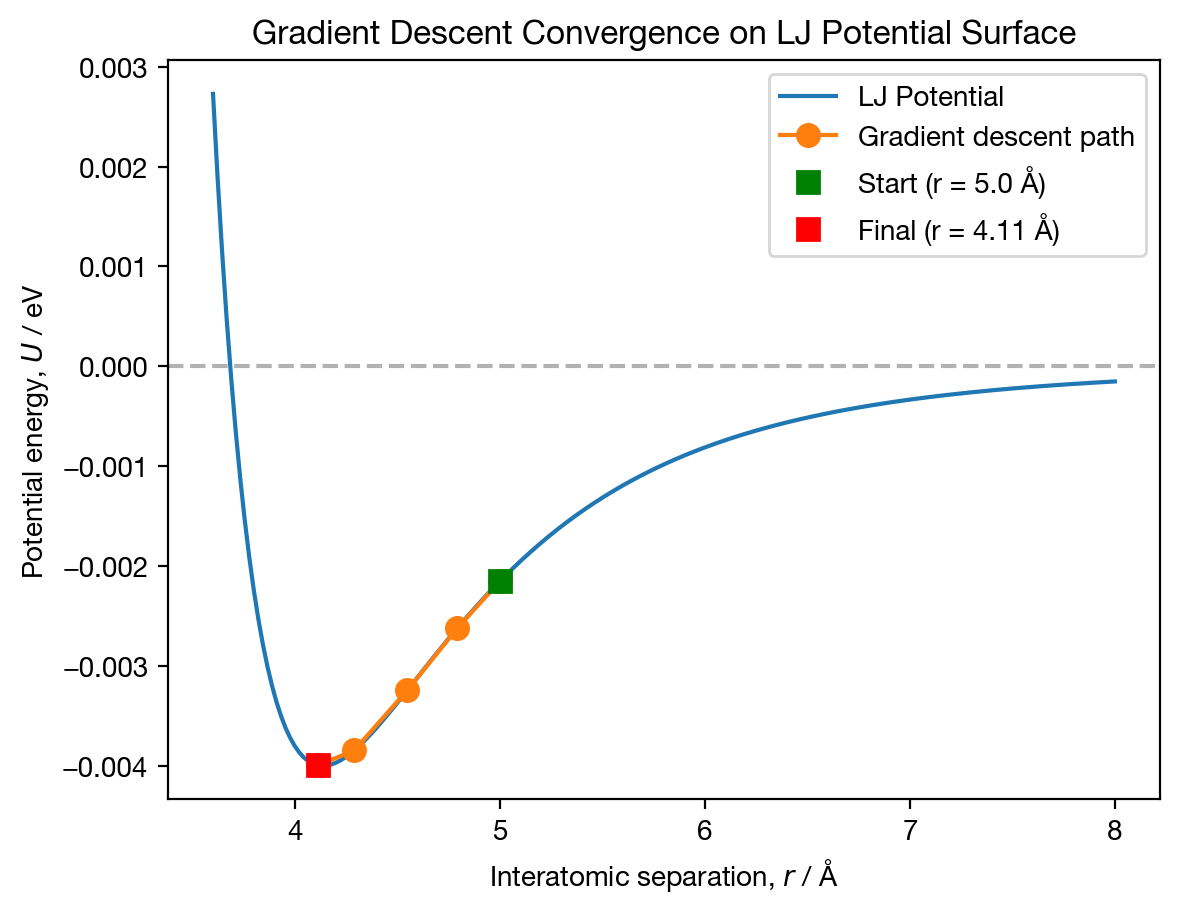

Starting position: r = 5.00 Å, U = -0.002 eV
Final position: r = 4.11 Å, U = -0.004 eV
Energy change: ΔU = -0.002 eV


In [7]:

# Plot the full potential energy surface
plt.plot(r_values, U_values, '-', label='LJ Potential')

# Calculate energies at visited positions
energies_visited = [lennard_jones(r, A, B) for r in positions]

# Plot the convergence path
plt.plot(positions, energies_visited, 'o-', markersize=8, 
         label='Gradient descent path')

# Mark the starting point
plt.plot(positions[0], energies_visited[0], 'gs', markersize=8, 
         label=f'Start (r = {positions[0]:.1f} Å)')

# Mark the final point
plt.plot(positions[-1], energies_visited[-1], 'rs', markersize=8, 
         label=f'Final (r = {positions[-1]:.2f} Å)')

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Interatomic separation, $r$ / Å')
plt.ylabel('Potential energy, $U$ / eV')
plt.title('Gradient Descent Convergence on LJ Potential Surface')
plt.legend()
plt.show()

print(f"Starting position: r = {positions[0]:.2f} Å, U = {energies_visited[0]:.3f} eV")
print(f"Final position: r = {positions[-1]:.2f} Å, U = {energies_visited[-1]:.3f} eV")
print(f"Energy change: ΔU = {energies_visited[-1] - energies_visited[0]:.3f} eV")

**Analysis of convergence behaviour:**

- **Number of iterations**: The algorithm converged in 4 iterations from this starting position (r = 5.0 Å).
- **Convergence smoothness**: The convergence is smooth and monotonic - the algorithm follows a clear path down the potential surface with no oscillation.
- **Adaptive step size**: The step size automatically decreases as we approach the minimum. At r = 5.0 Å, the gradient has magnitude |U'| ≈ 0.003 eV/Å, giving an initial step size of about 0.3 Å. As we approach the minimum where |U'(r)| → 0, the step size α × |U'(r)| naturally decreases, preventing overshooting and enabling smooth convergence.

---

## Part C: Exploring Different Starting Positions with Gradient Descent

The choice of starting position can significantly affect optimisation performance. We'll test three different starting positions.

### Questions 9-10: Test multiple starting positions

Test gradient descent with three different starting positions and compare the results.

Note the change in recommended parameters to $\alpha$ = 10, `tolerance` = 0.0005, and `max_iterations` = 500.

In [8]:
# Test three different starting positions
starting_positions = [3.2, 4.4, 6.0]  # Å
alpha = 10
max_iterations = 500
tolerance = 0.0005

# Store results for each starting position
results = []

for r_start in starting_positions:
    print(f"\n{'='*60}")
    print(f"Starting from r = {r_start} Å")
    print('='*60)
    
    # Initialize
    positions_trial = [r_start]
    gradients_trial = [lennard_jones_gradient(r_start, A, B)]
    r_current = r_start
    
    # Gradient descent loop
    converged = False
    for iteration in range(max_iterations):
        grad = lennard_jones_gradient(r_current, A, B)
        r_new = r_current - alpha * grad
        
        positions_trial.append(r_new)
        gradients_trial.append(lennard_jones_gradient(r_new, A, B))
        
        if abs(gradients_trial[-1]) < tolerance:
            converged = True
            print(f"✓ Converged after {iteration + 1} iterations")
            break
        
        r_current = r_new
    
    if not converged:
        print(f"✗ Did NOT converge within {max_iterations} iterations")
    
    # Store results
    results.append({
        'r_start': r_start,
        'r_final': positions_trial[-1],
        'iterations': len(positions_trial) - 1,
        'converged': converged,
        'positions': positions_trial,
        'gradients': gradients_trial
    })
    
    print(f"Final position: r = {positions_trial[-1]:.4f} Å")
    print(f"Final gradient: |U'| = {abs(gradients_trial[-1]):.6f} eV/Å")


Starting from r = 3.2 Å
✓ Converged after 96 iterations
Final position: r = 4.1626 Å
Final gradient: |U'| = 0.000431 eV/Å

Starting from r = 4.4 Å
✓ Converged after 16 iterations
Final position: r = 4.1668 Å
Final gradient: |U'| = 0.000492 eV/Å

Starting from r = 6.0 Å
✓ Converged after 123 iterations
Final position: r = 4.1648 Å
Final gradient: |U'| = 0.000462 eV/Å


**Analysis of results:**

**Do all starting positions converge to the same minimum?**

Yes, all three starting positions successfully converge to essentially the same minimum at r ≈ 4.16-4.17 Å, which matches our expectation from Part A. This demonstrates that gradient descent reliably finds the global minimum of the Lennard-Jones potential when appropriate parameters are used.

**Which starting position converges most quickly?**

Starting from r = 4.4 Å converges most quickly (16 iterations) because it's already close to the minimum. Starting from r = 3.2 Å requires 96 iterations, whilst r = 6.0 Å requires the most (123 iterations). The large number of iterations for r = 6.0 Å occurs because the gradient in this region is very small, so each step is modest in size.

**Did any starting positions fail to converge?**

With these parameters, all positions converge successfully. However, the need to increase max_iterations from 50 to 1000 and reduce α from 100 to 10 reveals important limitations of gradient descent with fixed learning rates.

**Slow convergence from distant starting points:**

The 96-123 iterations required when starting far from the minimum (r = 3.2 Å and r = 6.0 Å) highlight a key weakness of gradient descent: convergence can be very slow when the starting position is far from the optimum. This is particularly problematic for complex molecular systems where:

1. We often have poor initial guesses for the geometry
2. High-dimensional systems (molecules with many atoms) may require even more iterations
3. Each iteration requires expensive energy and gradient calculations

This inefficiency motivates the need for more sophisticated optimisation algorithms that converge faster, such as the Newton-Raphson method we'll explore in Part D.

**Is α = 10 appropriate everywhere?**

The varying iteration counts reveal that no single α value is optimal across all regions:

- **At r = 6.0 Å**: The gradient is very small (|U'| ~ 0.001 eV/Å), so α = 10 gives tiny steps (~0.01 Å), requiring 123 iterations. A larger α would converge faster here.

- **Near the minimum (r ≈ 4.4 Å)**: The gradient is nearly zero, so α = 10 works well - steps automatically become small and convergence is smooth (16 iterations).

- **At r = 3.2 Å (repulsive wall)**: The gradient is large (|U'| ~ 0.1-1 eV/Å), so even with α = 10, the first step overshoots the minimum significantly, pushing the system into the long-range attractive region (r > 6 Å). The algorithm then spends most of the 96 iterations slowly crawling back down from this shallow-gradient region. This demonstrates the challenge of choosing α: a value that prevents catastrophic overshooting (like α = 100 would cause) can still result in initial overshooting followed by very slow convergence.

**Key insights:**

This exercise demonstrates a fundamental challenge with fixed-step gradient descent: the optimal learning rate varies dramatically across the potential energy surface. The Lennard-Jones potential is particularly challenging because:

1. The **repulsive wall** (r < 4 Å) has very steep gradients requiring small α
2. The **long-range region** (r > 5 Å) has very shallow gradients that could benefit from large α
3. No single α value is optimal everywhere

More sophisticated optimisation methods address this through adaptive learning rates, line search algorithms, or by using second-order derivative information (as in Newton-Raphson, which we explore next).

---

## Part D: Newton-Raphson Optimisation

The Newton-Raphson method uses both first and second derivative information to converge more rapidly than gradient descent.

### Question 11: Define the second derivative function

Write a function `lennard_jones_second_derivative(r, A, B)` that calculates $U''_\mathrm{LJ}(r) = 156\frac{A}{r^{14}} - 42\frac{B}{r^8}$.

In [9]:
def lennard_jones_second_derivative(r, A, B):
    """
    Calculate the second derivative of the Lennard-Jones potential.
    
    Args:
        r (float): Interatomic separation in Angstroms.
        A (float): Repulsive term coefficient (eV Å^12).
        B (float): Attractive term coefficient (eV Å^6).
        
    Returns:
        flaot: Second derivative d²U/dr² in eV/Å².
    """
    return 156 * A / r**14 - 42 * B / r**8

# Test the function at r = 4.4 Å (near the minimum)
test_r = 4.4
test_second_deriv = lennard_jones_second_derivative(test_r, A, B)
print(f"At r = {test_r} Å:")
print(f"  U' = {lennard_jones_gradient(test_r, A, B):.6f} eV/Å")
print(f"  U'' = {test_second_deriv:.6f} eV/Å²")
print("\nAt a minimum, U' ≈ 0 and U'' > 0 (positive curvature)")

At r = 4.4 Å:
  U' = 0.002337 eV/Å
  U'' = 0.003345 eV/Å²

At a minimum, U' ≈ 0 and U'' > 0 (positive curvature)


### Questions 12-13: Implement Newton-Raphson optimisation

Implement Newton-Raphson starting from r = 5.0 Å.

In [10]:
# Newton-Raphson parameters
r_start_nr = 5.0  # Å
max_iterations = 50
tolerance = 0.0005  # Using same tolerance as gradient descent for comparison

# Initialize storage
positions_nr = [r_start_nr]
gradients_nr = [lennard_jones_gradient(r_start_nr, A, B)]

# Current position
r_current = r_start_nr

# Newton-Raphson loop
for iteration in range(max_iterations):
    # Calculate first and second derivatives
    grad = lennard_jones_gradient(r_current, A, B)
    second_deriv = lennard_jones_second_derivative(r_current, A, B)
    
    # Update using Newton-Raphson: r_{i+1} = r_i - U'(r_i) / U''(r_i)
    r_new = r_current - grad / second_deriv
    
    # Store position and gradient
    positions_nr.append(r_new)
    gradients_nr.append(lennard_jones_gradient(r_new, A, B))
    
    # Check convergence
    if abs(gradients_nr[-1]) < tolerance:
        print(f"Converged after {iteration + 1} iterations")
        break
    
    # Update current position
    r_current = r_new
else:
    print(f"Did not converge within {max_iterations} iterations")

# Print results
print(f"\nFinal equilibrium separation: r = {positions_nr[-1]:.4f} Å")
print(f"Number of iterations required: {len(positions_nr) - 1}")
print(f"Final gradient: |U'| = {abs(gradients_nr[-1]):.6f} eV/Å")

Converged after 2 iterations

Final equilibrium separation: r = 7.1626 Å
Number of iterations required: 2
Final gradient: |U'| = 0.000239 eV/Å


### Question 14: Compare convergence paths

Compare the convergence of gradient descent and Newton-Raphson, both starting from r = 5.0 Å.

**Note:** We need to re-run gradient descent from r = 5.0 Å with parameters ($\alpha$ = 10, `tolerance` = 0.0005) for a fair comparison.

In [11]:
# Re-run gradient descent from r = 5.0 Å for comparison
r_start_gd = 5.0
alpha = 10
positions_gd = [r_start_gd]
gradients_gd = [lennard_jones_gradient(r_start_gd, A, B)]
r_current = r_start_gd

for iteration in range(max_iterations):
    grad = lennard_jones_gradient(r_current, A, B)
    r_new = r_current - alpha * grad
    
    positions_gd.append(r_new)
    gradients_gd.append(lennard_jones_gradient(r_new, A, B))
    
    if abs(gradients_gd[-1]) < tolerance:
        break
    
    r_current = r_new

print(f"Gradient descent from r = 5.0 Å: {len(positions_gd) - 1} iterations")
print(f"Newton-Raphson from r = 5.0 Å: {len(positions_nr) - 1} iterations")

Gradient descent from r = 5.0 Å: 41 iterations
Newton-Raphson from r = 5.0 Å: 2 iterations


**Analysis:**

**How does the convergence speed of Newton-Raphson compare to gradient descent?**

Newton-Raphson converges dramatically faster than gradient descent. From r = 5.0 Å, Newton-Raphson requires only 2 iterations, whilst gradient descent requires 41 iterations - more than 20 times as many! This superior convergence is due to Newton-Raphson using second-derivative (curvature) information to take more accurate steps towards the minimum.

**Why doesn't Newton-Raphson converge in a single step?**

Unlike the harmonic potential (where Newton-Raphson converges in exactly one step), the Lennard-Jones potential is not quadratic. Newton-Raphson assumes the function is locally quadratic around the current position, but:

- The harmonic potential is **exactly** quadratic everywhere, so the local quadratic approximation is perfect
- The Lennard-Jones potential is **approximately** quadratic only near the minimum
- Far from the minimum, the LJ potential has significant higher-order (cubic, quartic, etc.) terms that the quadratic approximation doesn't capture

Therefore, Newton-Raphson must iterate, with each step improving the approximation as we get closer to the minimum where the quadratic assumption becomes more accurate.


---

## Part E: Comparing Methods Across Different Starting Positions

Now we'll test Newton-Raphson with the same three starting positions used in Part C and compare performance with gradient descent.

### Question 15: Test Newton-Raphson from multiple starting positions

Test Newton-Raphson with starting positions r = 3.2 Å, r = 4.4 Å, and r = 6.0 Å.

In [12]:
# Test Newton-Raphson from the same three starting positions
starting_positions = [3.2, 4.4, 6.0]  # Å
max_iterations = 50
tolerance = 0.0005

# Store results for Newton-Raphson
results_nr = []

for r_start in starting_positions:
    print(f"\n{'='*60}")
    print(f"Newton-Raphson starting from r = {r_start} Å")
    print('='*60)
    
    # Initialize
    positions_trial = [r_start]
    gradients_trial = [lennard_jones_gradient(r_start, A, B)]
    r_current = r_start
    
    # Newton-Raphson loop
    converged = False
    for iteration in range(max_iterations):
        grad = lennard_jones_gradient(r_current, A, B)
        second_deriv = lennard_jones_second_derivative(r_current, A, B)
        
        r_new = r_current - grad / second_deriv
        
        positions_trial.append(r_new)
        gradients_trial.append(lennard_jones_gradient(r_new, A, B))
        
        if abs(gradients_trial[-1]) < tolerance:
            converged = True
            print(f"Converged after {iteration + 1} iterations")
            break
        
        r_current = r_new
    
    if not converged:
        print(f"Did not converge within {max_iterations} iterations")
    
    # Store results
    results_nr.append({
        'r_start': r_start,
        'r_final': positions_trial[-1],
        'iterations': len(positions_trial) - 1,
        'converged': converged,
        'positions': positions_trial,
        'gradients': gradients_trial
    })
    
    print(f"Final position: r = {positions_trial[-1]:.4f} Å")
    print(f"Final gradient: |U'| = {abs(gradients_trial[-1]):.6f} eV/Å")


Newton-Raphson starting from r = 3.2 Å
Converged after 6 iterations
Final position: r = 4.1321 Å
Final gradient: |U'| = 0.000053 eV/Å

Newton-Raphson starting from r = 4.4 Å
Converged after 4 iterations
Final position: r = 4.1155 Å
Final gradient: |U'| = 0.000348 eV/Å

Newton-Raphson starting from r = 6.0 Å
Converged after 1 iterations
Final position: r = 6.9554 Å
Final gradient: |U'| = 0.000291 eV/Å


**Analysis:**

**1. Newton-Raphson converges rapidly from r = 3.2 Å and r = 4.4 Å**

For the first two starting positions, Newton-Raphson shows dramatic speed advantages:

- **From r = 3.2 Å**: Newton-Raphson requires 6 iterations vs 96 for gradient descent (~16× faster)
- **From r = 4.4 Å**: Newton-Raphson requires 4 iterations vs 16 for gradient descent (~4× faster)

Newton-Raphson achieves this speed by using second-derivative information to predict the optimal step size at each iteration, rather than relying on a fixed learning rate. This allows it to take larger, more accurate steps directly towards the minimum. The speedup is particularly dramatic when starting from the repulsive wall (r = 3.2 Å), where gradient descent struggles with large gradients and requires many small steps to avoid overshooting.

**2. Newton-Raphson fails completely from r = 6.0 Å**

From r = 6.0 Å, Newton-Raphson converges to r = 6.96 Å after just 1 iteration. This is **not the minimum** - the algorithm has moved further away from the minimum at r ≈ 4.1 Å rather than towards it. Gradient descent, by contrast, successfully finds the minimum in 123 iterations.

This failure occurs because **Newton-Raphson's fundamental assumption breaks down**. The method assumes the function curves upward (positive curvature, U'' > 0) like a bowl. However, at r = 6.0 Å we're in the long-range tail where the curvature is **negative** (U'' < 0) - the potential curves downward.

When U'' < 0, the Newton-Raphson formula r_new = r_old - U'/U'' produces a step in the **wrong direction**. The negative curvature causes the algorithm to step uphill (towards larger r) rather than downhill towards the minimum. The algorithm then stops because the gradient at r = 6.96 Å happens to be below the convergence tolerance, even though this point is nowhere near the actual minimum.

Gradient descent always moves downhill (in the direction of -U') regardless of curvature, making it slower but more reliable.